```{contents}
```

## KNN Variants

One limitation of standard K-Nearest Neighbors (KNN) is that **finding the nearest neighbors requires computing the distance to all points in the dataset**.

* If there are $n$ points, this is **O(n) time complexity per query**, which is inefficient for large datasets.

To optimize this, we use **spatial data structures** like **K-d Tree** and **Ball Tree**.

---

### **1. K-d Tree (k-dimensional Tree)**

#### **Idea**

* A **binary tree** that partitions the data space along feature axes (dimensions).
* At each node, the data is split based on the **median value** of a particular dimension, alternating between dimensions at each level.
* This creates **hierarchical regions**, so you don’t need to check all points during a search.

#### **Construction**

1. **Start with all points**.
2. **Select a dimension** (e.g., x-axis = feature F1 for the first split).
3. **Compute the median** of that dimension.
4. **Split the points** into two groups:

   * Left subtree: points ≤ median
   * Right subtree: points > median
5. **Alternate dimensions** at each level (e.g., F1 → F2 → F1 → …)
6. **Recursively split** each region until each leaf node has a small number of points.

#### **Example**

* Suppose points: (7,2), (5,4), (4,7), (2,3), (8,1), (9,6)
* **First split**: median F1 = 7 → splits points into left (≤7) and right (>7)
* **Second split**: median F2 of left points = 4 → splits left region into top and bottom
* Repeat recursively, alternating F1 and F2.

#### **Searching**

* To find the nearest neighbors:

  1. Traverse the tree to locate the **region containing the query point**.
  2. Compute distances **only within this region first**.
  3. **Backtracking** is used to check neighboring regions if necessary for additional nearest neighbors.
* This drastically reduces the number of distance computations compared to brute-force search.

---

### **2. Ball Tree**

#### **Idea**

* A Ball Tree groups points **based on proximity**, enclosing them in hyperspheres (balls).
* Unlike K-d Tree, Ball Tree uses **distance-based grouping**, not axis-aligned splits.

#### **Construction**

1. **Start with all points**.
2. **Cluster nearby points** together into groups.
3. **Each group forms a “ball”** with a center and radius covering all its points.
4. **Recursively combine balls** into larger parent balls until all points are included in a root ball.

#### **Example**

* Suppose points: 1,2,3,4,5,6,7,8,9
* **Step 1:** Create small groups:

  * G1 = {1,2}, G2 = {3,4}, G3 = {5,6,7}, G4 = {8,9}
* **Step 2:** Merge nearby groups:

  * G5 = merge(G1,G2), G6 = merge(G3,G4)
* **Step 3:** Merge top-level groups:

  * G7 = merge(G5,G6) → root
* Each ball represents a spatial region for efficient neighbor search.

#### **Searching**

* For a new query point:

  1. Start at the root ball.
  2. **Check if the query lies within a ball** → only compute distances within relevant balls.
  3. Traverse **down the hierarchy** to find nearest points.
* **No backtracking** is usually needed if the query is far from other balls, making it faster than K-d Tree in some cases.

---

### **3. Benefits of K-d Tree and Ball Tree**

| Feature      | K-d Tree                                | Ball Tree                     |
| ------------ | --------------------------------------- | ----------------------------- |
| Splitting    | Axis-aligned, alternating               | Distance-based (spherical)    |
| Backtracking | Required for accurate nearest neighbors | Often minimized               |
| Best for     | Low-dimensional data                    | High-dimensional data         |
| Complexity   | O(log n) per search (average)           | O(log n) per search (average) |

* Both trees **reduce time complexity** from O(n) to roughly **O(log n)** per query.
* Instead of computing distances to all points, we **prune large portions of the dataset** that cannot contain the nearest neighbors.

---

### **4. Intuition Summary**

1. **K-d Tree**

   * Imagine slicing the space along x and y axes repeatedly.
   * Query points only need to check the slice they belong to and nearby slices.

2. **Ball Tree**

   * Imagine enclosing points in balls.
   * Query points only search balls near them, skipping faraway groups entirely.

* **Overall Goal:** Reduce distance computations → faster KNN search → scalable for larger datasets.

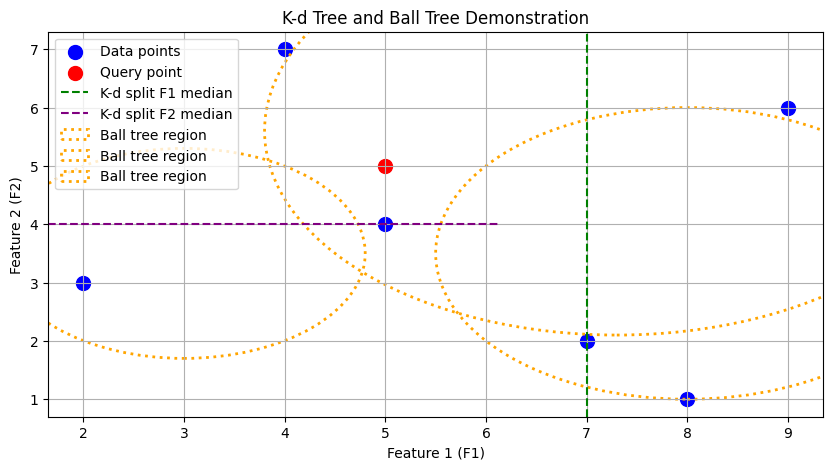

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, BallTree
import numpy as np

# Sample 2D data points
X = np.array([[7,2], [5,4], [4,7], [2,3], [8,1], [9,6]])

# Query point
query = np.array([[5,5]])

# Plot original points and query
plt.figure(figsize=(10,5))

plt.scatter(X[:,0], X[:,1], c='blue', label='Data points', s=100)
plt.scatter(query[:,0], query[:,1], c='red', label='Query point', s=100)

# Plot K-d tree splits (manually for demonstration, approximate)
plt.axvline(x=7, color='green', linestyle='--', label='K-d split F1 median')
plt.axhline(y=4, xmin=0.0, xmax=0.58, color='purple', linestyle='--', label='K-d split F2 median')

# Plot Ball Tree circles (center + radius covering points in a ball)
ball_centers = np.array([[3,3.5],[8,3.5],[7.3,5.6]])
ball_radii = [1.8, 2.5, 3.5]

for center, r in zip(ball_centers, ball_radii):
    circle = plt.Circle(center, r, color='orange', fill=False, linestyle=':', linewidth=2, label='Ball tree region')
    plt.gca().add_patch(circle)

plt.xlabel('Feature 1 (F1)')
plt.ylabel('Feature 2 (F2)')
plt.title('K-d Tree and Ball Tree Demonstration')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
